1. Load dataset from - https://covid.ourworldindata.org/data/owid-covid-data.csv 

2. Subset only those rows that have “India” in the “location” column(This subsetted dataframe has to be used for modelling) 

3. Univariate Analysis: 
       a. Draw histograms of each numerical variable 
       b. Find mean, median and mode of each column 

4. Bivariate Analysis: 
       a. Draw scatter plots of each numerical column versus one another 
       b. Draw line plots of each numerical column versus one another 

5. Handle Missing values:   
       a. If there are null values in numerical column, replace the null values by the mean of that column  
       b. If there are null values in categorical column, replace the null values by the mode of that column 
       c. If more than 50%the values in a column are null, then drop that entire column 

6. Convert date column to ordinal 
       a. Code: import datetime as dt 
                df["date"]=pd.to_datetime(df["date"]) 
                df["date"]=df["date"].map(dt.datetime.toordinal)

7. Drop all categorical columns 

8. Select “total_cases” column as the target variable 

9. Select the other columns as the features(the “date” column has to be in the features) 

10. Perform train-test split 

11. Modelling: 
        a. Linear Regression 
        b. Random Forest Regressor 

12. Get accuracy 

13. Predict Total case for a new date 

NOTE: To convert anytime back from ordinal to date-time use the following sample code: from datetime import datetime ordinal value = 733828 # This is an example

In [1]:
#Importing required packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading dataset
df_covid = pd.read_csv('/content/owid-covid-data.csv')

In [3]:
#Let's check how the data is distributed
df_covid.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83


In [4]:
# df_covid.tail()

In [5]:
# df_covid.shape

In [6]:
# df_covid.columns

In [7]:
#Information about the data columns
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30431 entries, 0 to 30430
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         30367 non-null  object 
 1   continent                        30169 non-null  object 
 2   location                         30431 non-null  object 
 3   date                             30431 non-null  object 
 4   total_cases                      30120 non-null  float64
 5   new_cases                        30120 non-null  float64
 6   total_deaths                     30120 non-null  float64
 7   new_deaths                       30120 non-null  float64
 8   total_cases_per_million          30056 non-null  float64
 9   new_cases_per_million            30056 non-null  float64
 10  total_deaths_per_million         30056 non-null  float64
 11  new_deaths_per_million           30056 non-null  float64
 12  total_tests       

In [8]:
# Information on the Dataset
df_covid.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,3.012000e+04,30120.000000,30120.000000,30120.000000,30056.000000,30056.000000,30056.000000,30056.000000,9.243000e+03,8844.000000,9243.000000,8844.000000,10041.000000,10041.000000,24621.000000,3.036700e+04,29079.000000,27424.000000,27031.000000,27283.000000,27101.000000,18132.000000,27447.000000,28357.000000,21872.000000,21614.000000,12476.000000,25012.000000,30007.000000
mean,4.184206e+04,883.078552,2336.914276,38.400996,957.103251,16.562589,37.136255,0.523218,6.433078e+05,15527.596789,25.719837,0.555073,14437.308834,0.514701,58.281037,9.649796e+07,369.691300,31.727695,9.507136,6.030306,21734.842082,11.284210,248.995017,8.037692,11.039211,32.642025,53.538346,3.158227,74.311094
std,4.216805e+05,7980.670278,22456.306856,337.512278,2399.404591,62.374698,118.443085,2.963908,2.505799e+06,53808.953268,42.975341,0.976099,48687.468603,0.834861,30.549020,6.450356e+08,1691.161227,9.003903,6.392993,4.377218,20778.647593,18.568924,118.165279,4.105816,10.516487,13.324101,31.386613,2.558645,7.295529
min,0.000000e+00,-29726.000000,0.000000,-1918.000000,0.000000,-437.881000,0.000000,-41.023000,1.000000e+00,-3743.000000,0.000000,-0.212000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000
25%,1.800000e+01,0.000000,0.000000,0.000000,6.103000,0.000000,0.000000,0.000000,2.249100e+04,824.000000,1.289000,0.053000,914.000000,0.055000,37.040000,1.886202e+06,39.497000,24.900000,3.655000,2.171000,6171.884000,0.500000,152.783000,5.310000,1.900000,21.400000,22.863000,1.380000,70.600000
50%,3.350000e+02,5.000000,7.000000,0.000000,116.360500,0.639500,1.498000,0.000000,9.734000e+04,2767.500000,7.152000,0.229000,3041.000000,0.237000,68.520000,8.947027e+06,90.672000,31.900000,7.150000,4.458000,15308.712000,1.700000,235.954000,7.110000,6.900000,31.400000,59.550000,2.540000,75.860000
75%,3.932500e+03,85.000000,86.000000,2.000000,738.831000,9.449000,17.086250,0.118000,3.763960e+05,9121.500000,33.110500,0.688000,9047.000000,0.661000,82.410000,3.236600e+07,222.873000,40.100000,14.864000,9.720000,33132.320000,14.800000,317.840000,10.080000,19.600000,40.900000,83.741000,4.210000,80.180000
max,1.329916e+07,230051.000000,578319.000000,10489.000000,36282.826000,4944.376000,1237.551000,200.040000,4.028218e+07,823375.000000,449.588000,18.630000,666622.000000,13.379000,100.000000,7.794799e+09,19347.500000,48.200000,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000,86.750000


In [9]:
#Checking Null values on the dataset
df_covid.isnull().sum()

iso_code                              64
continent                            262
location                               0
date                                   0
total_cases                          311
new_cases                            311
total_deaths                         311
new_deaths                           311
total_cases_per_million              375
new_cases_per_million                375
total_deaths_per_million             375
new_deaths_per_million               375
total_tests                        21188
new_tests                          21587
total_tests_per_thousand           21188
new_tests_per_thousand             21587
new_tests_smoothed                 20390
new_tests_smoothed_per_thousand    20390
tests_units                        19695
stringency_index                    5810
population                            64
population_density                  1352
median_age                          3007
aged_65_older                       3400
aged_70_older   

In [10]:
# Subsetting those rows where location is India
df=df_covid[df_covid["location"]=="India"]

In [11]:
# Let's check the new dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [12]:
# df.tail()

In [13]:
# df.shape

In [14]:
# Information about the new Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 12708 to 12904
Data columns (total 34 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   iso_code                         197 non-null    object 
 1   continent                        197 non-null    object 
 2   location                         197 non-null    object 
 3   date                             197 non-null    object 
 4   total_cases                      197 non-null    float64
 5   new_cases                        197 non-null    float64
 6   total_deaths                     197 non-null    float64
 7   new_deaths                       197 non-null    float64
 8   total_cases_per_million          197 non-null    float64
 9   new_cases_per_million            197 non-null    float64
 10  total_deaths_per_million         197 non-null    float64
 11  new_deaths_per_million           197 non-null    float64
 12  total_tests     

In [15]:
# More information on the new dataset
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.110000e+02,105.000000,111.000000,105.000000,116.000000,116.000000,191.000000,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02,1.970000e+02
mean,127764.644670,4752.187817,3722.492386,123.395939,92.582726,3.443609,2.697457,0.089406,3.523086e+06,111155.885714,2.552982,0.080543,94924.129310,0.068784,55.309005,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,223896.756462,7482.086884,6350.676644,211.699984,162.243537,5.421787,4.601924,0.153363,3.468878e+06,78013.256672,2.513632,0.056554,75727.681086,0.054900,38.145755,0.000000e+00,6.268707e-13,1.032912e-13,1.335662e-14,9.794854e-15,2.005986e-11,7.479707e-14,7.408472e-13,4.452206e-14,4.452206e-15,6.411177e-14,1.282235e-13,8.904413e-16,1.139765e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,0.005000,0.000000,1121.000000,0.001000,0.000000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,3.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,4.321035e+05,41247.000000,0.313000,0.030000,26859.000000,0.019500,10.190000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,5194.000000,678.000000,149.000000,23.000000,3.764000,0.491000,0.108000,0.017000,2.404267e+06,101475.000000,1.742000,0.074000,87833.500000,0.063500,75.460000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,151767.000000,6767.000000,4337.000000,175.000000,109.976000,4.904000,3.143000,0.127000,5.847601e+06,151808.000000,4.237500,0.110000,142013.750000,0.103000,81.940000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,936181.000000,29429.000000,24309.000000,2003.000000,678.390000,21.325000,17.615000,1.451000,1.180626e+07,283659.000000,8.555000,0.206000,262371.000000,0.190000,100.000000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


In [16]:
#Checking Null values on the new dataset
df.isnull().sum()

iso_code                            0
continent                           0
location                            0
date                                0
total_cases                         0
new_cases                           0
total_deaths                        0
new_deaths                          0
total_cases_per_million             0
new_cases_per_million               0
total_deaths_per_million            0
new_deaths_per_million              0
total_tests                        86
new_tests                          92
total_tests_per_thousand           86
new_tests_per_thousand             92
new_tests_smoothed                 81
new_tests_smoothed_per_thousand    81
tests_units                        74
stringency_index                    6
population                          0
population_density                  0
median_age                          0
aged_65_older                       0
aged_70_older                       0
gdp_per_capita                      0
extreme_pove

In [17]:
# To check for number of columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [18]:
# Defining a variable cols 
cols=['total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

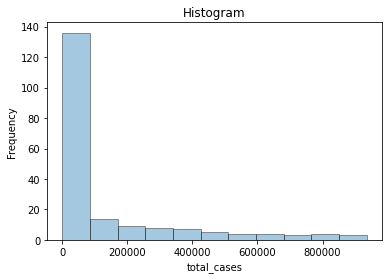

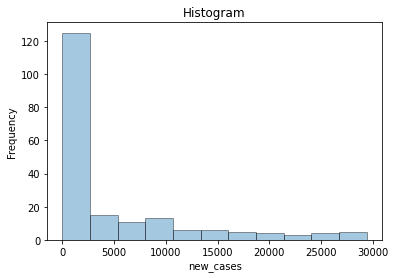

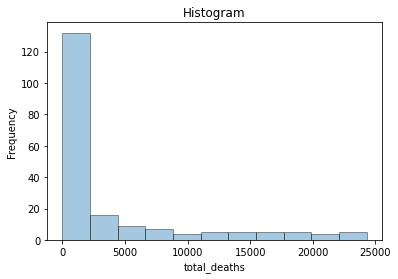

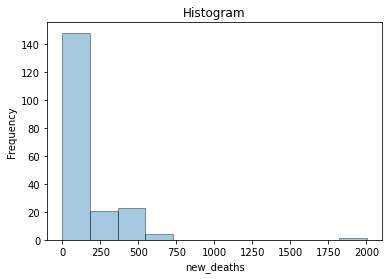

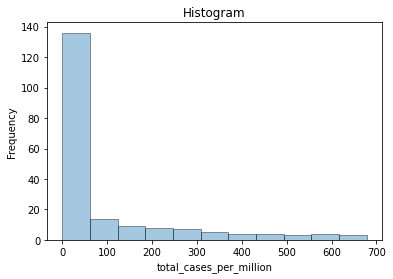

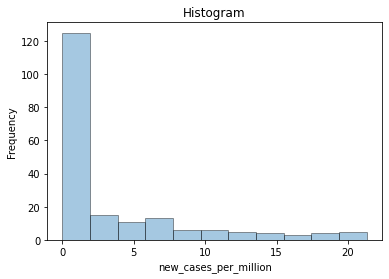

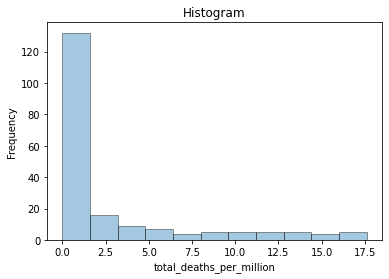

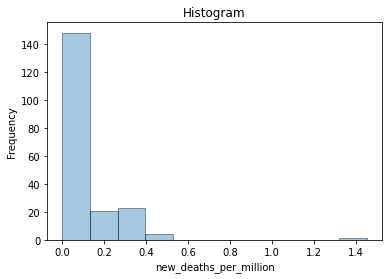

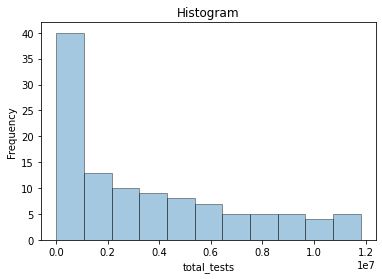

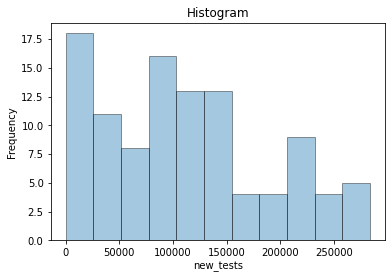

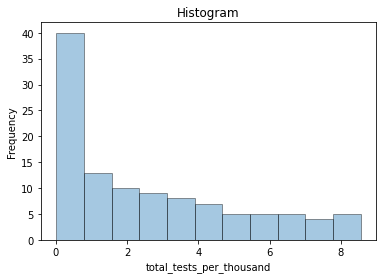

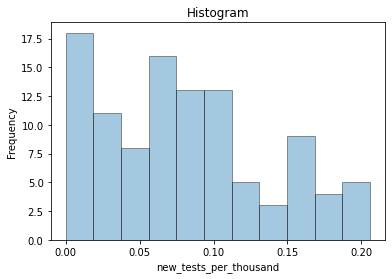

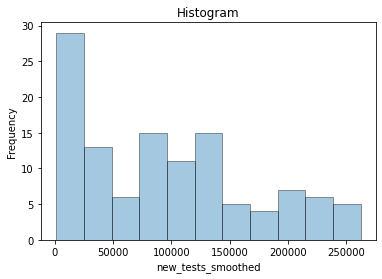

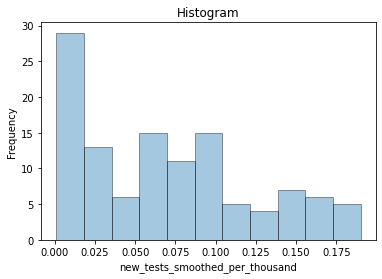

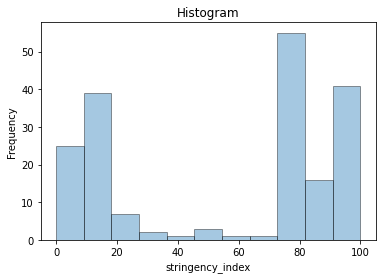

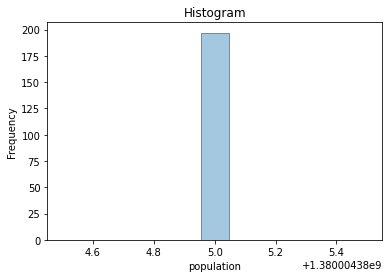

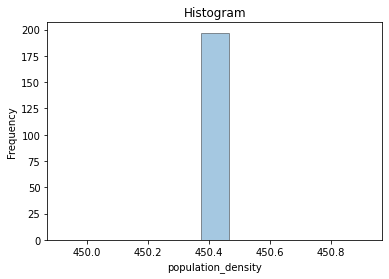

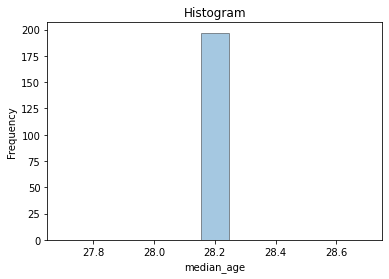

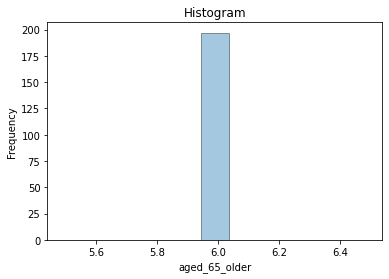

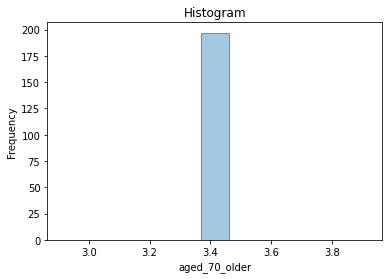

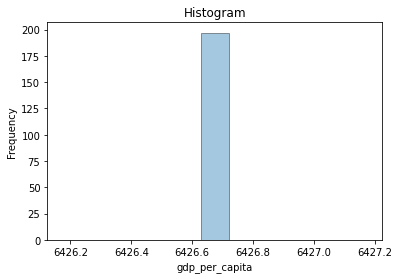

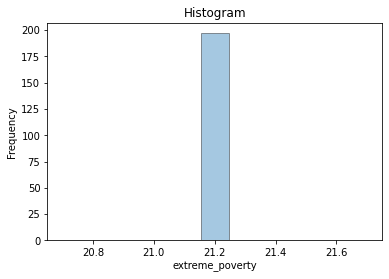

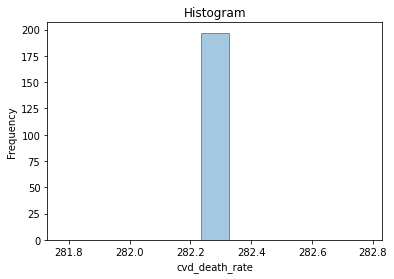

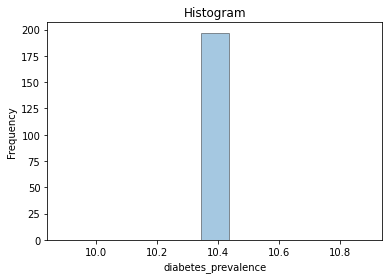

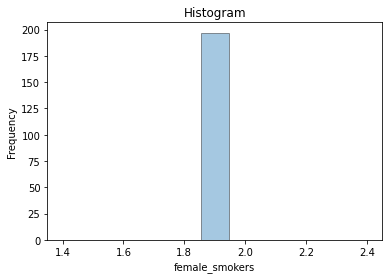

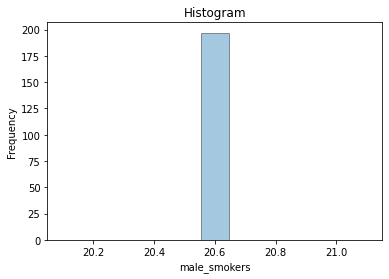

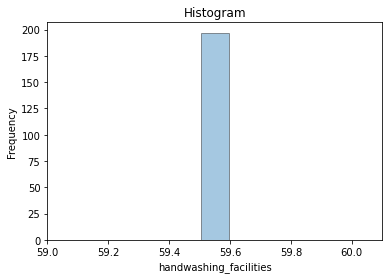

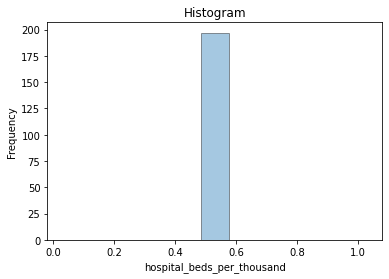

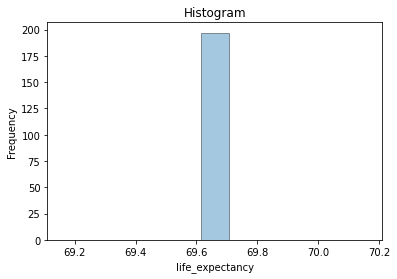

In [19]:
#Plotting Histograms
for i in cols:
  sns.distplot(df[i],kde=False,hist=True,bins=11,hist_kws=dict(edgecolor="k", linewidth=1))
  plt.title("Histogram")
  plt.ylabel("Frequency")
  plt.show()

In [20]:
#Plotting Boxplots

# for i in cols:
#   sns.boxplot(y=i, data = df)
#   #sns.boxplot(y=i, data = df)
#   plt.title("Boxplot 11")
#   plt.show()

In [21]:
# Checking the mean of each column in the new dataset
df.mean()

total_cases                        1.277646e+05
new_cases                          4.752188e+03
total_deaths                       3.722492e+03
new_deaths                         1.233959e+02
total_cases_per_million            9.258273e+01
new_cases_per_million              3.443609e+00
total_deaths_per_million           2.697457e+00
new_deaths_per_million             8.940609e-02
total_tests                        3.523086e+06
new_tests                          1.111559e+05
total_tests_per_thousand           2.552982e+00
new_tests_per_thousand             8.054286e-02
new_tests_smoothed                 9.492413e+04
new_tests_smoothed_per_thousand    6.878448e-02
stringency_index                   5.530901e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989000e+00
aged_70_older                      3.414000e+00
gdp_per_capita                     6.426

In [22]:
# Checking the median of each column in the new dataset
df.median()

total_cases                        5.194000e+03
new_cases                          6.780000e+02
total_deaths                       1.490000e+02
new_deaths                         2.300000e+01
total_cases_per_million            3.764000e+00
new_cases_per_million              4.910000e-01
total_deaths_per_million           1.080000e-01
new_deaths_per_million             1.700000e-02
total_tests                        2.404267e+06
new_tests                          1.014750e+05
total_tests_per_thousand           1.742000e+00
new_tests_per_thousand             7.400000e-02
new_tests_smoothed                 8.783350e+04
new_tests_smoothed_per_thousand    6.350000e-02
stringency_index                   7.546000e+01
population                         1.380004e+09
population_density                 4.504190e+02
median_age                         2.820000e+01
aged_65_older                      5.989000e+00
aged_70_older                      3.414000e+00
gdp_per_capita                     6.426

In [23]:
# Checking the mode of each column in the new dataset
df.mode()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,IND,Asia,India,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6500.0,157.0,0.01,0.001,1125.0,0.001,samples tested,10.19,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
1,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13125.0,191.0,NaN,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13316.0,1060.0,NaN,0.062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14376.0,1298.0,NaN,0.067,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15701.0,1325.0,NaN,0.084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,NaN,NaN,NaN,2020-07-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,2020-07-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,NaN,NaN,NaN,2020-07-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195,NaN,NaN,NaN,2020-07-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
#sns.pairplot(df)

In [25]:
# Plotting ScatterPlots

# for i in cols:
#   for j in reversed(cols):
#     sns.scatterplot(x=i, y=j, data=df)
#     plt.title("Scatter Plot")
#     plt.show()

In [26]:
# Defining  new variables for cols 
cols=[ 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy']

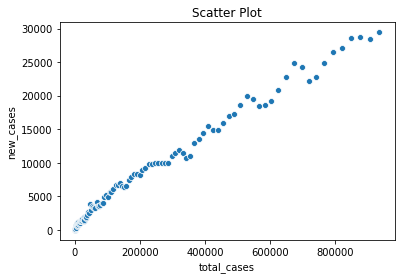

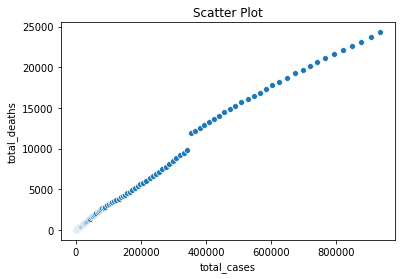

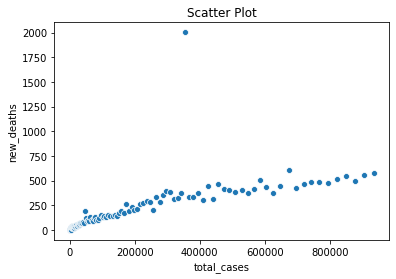

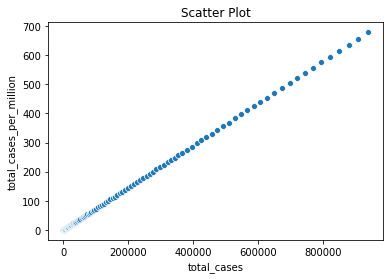

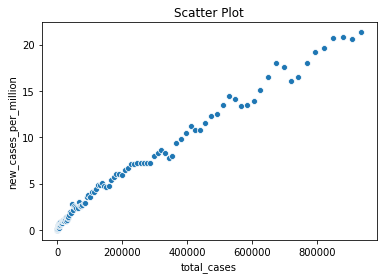

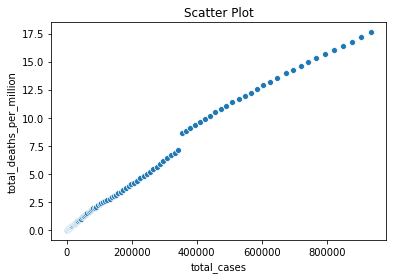

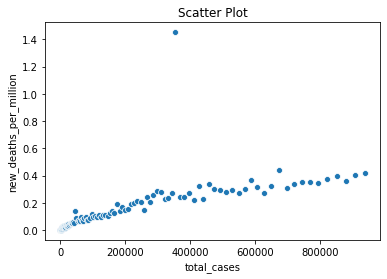

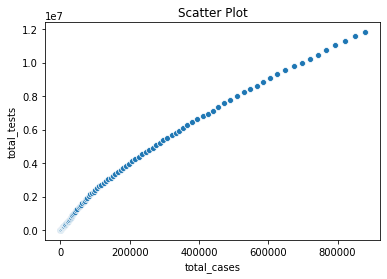

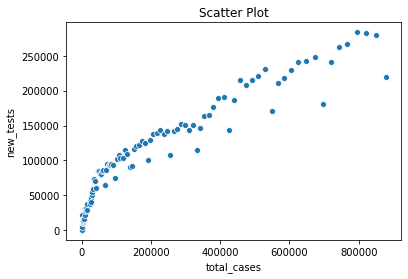

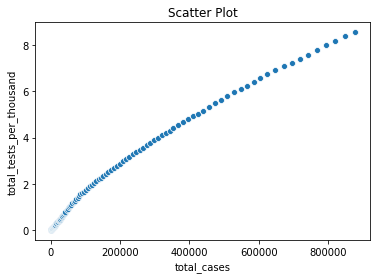

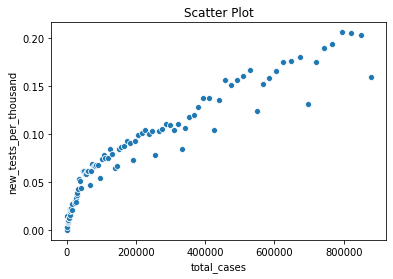

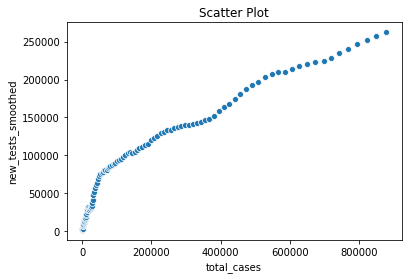

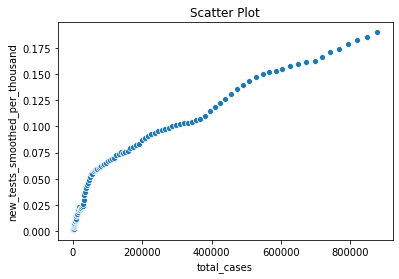

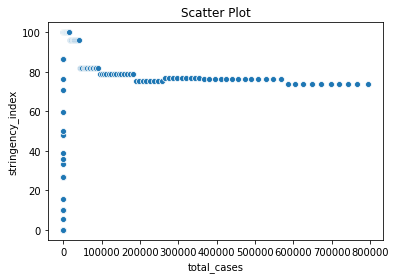

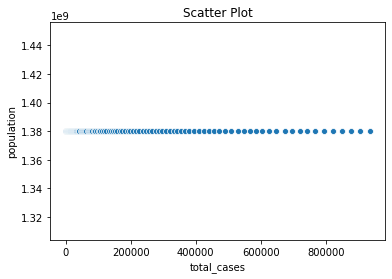

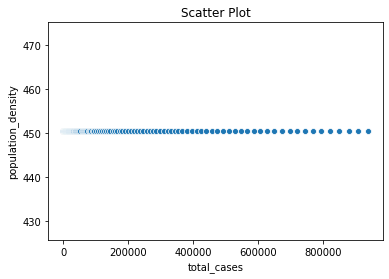

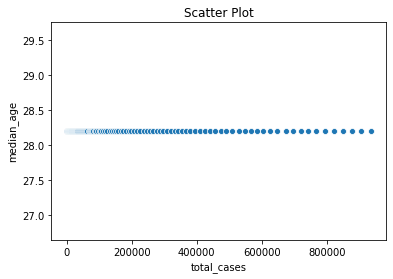

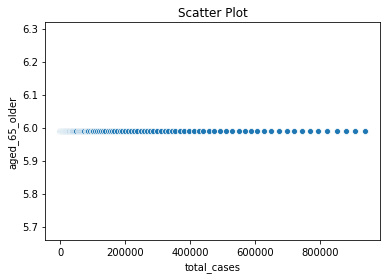

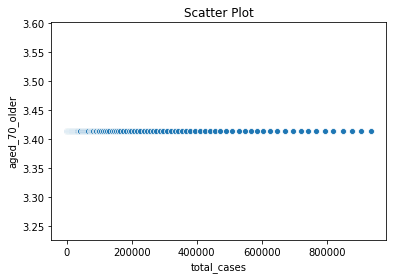

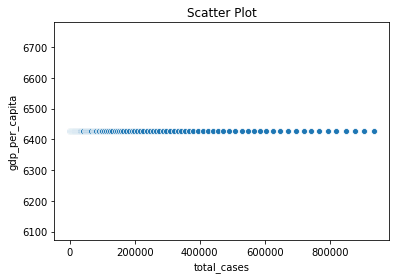

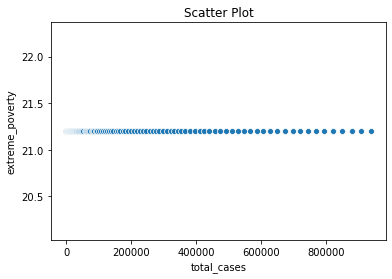

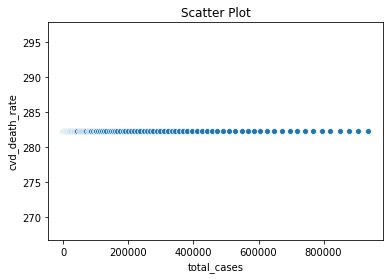

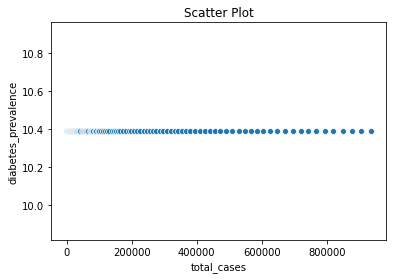

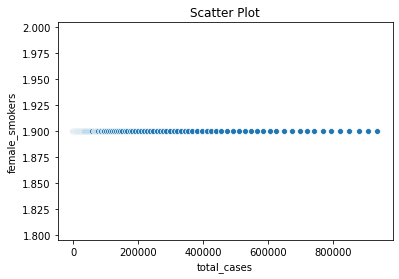

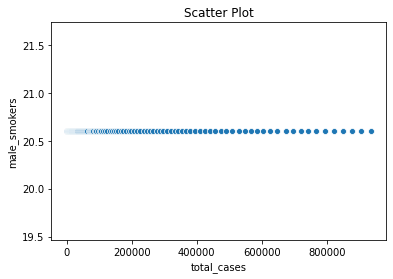

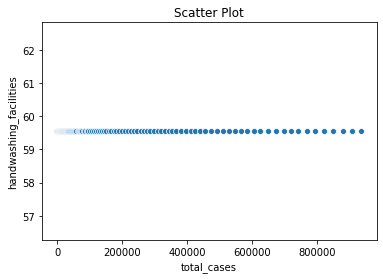

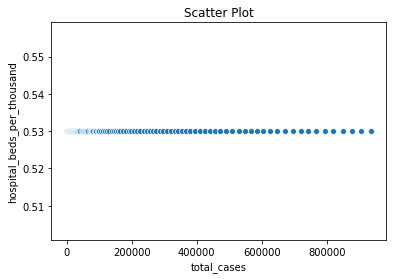

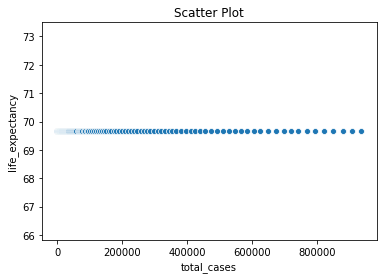

In [27]:
# Plotting ScatterPlots
for i in cols:
    sns.scatterplot(x='total_cases', y=i, data=df)
    plt.title("Scatter Plot")
    plt.show()

In [28]:
#Plotting Lineplots

# for i in cols:
#   for j in reversed(cols):
#     sns.lineplot(x=i,y=j,data=df)
#     plt.title("Line Plots")
#     plt.show()

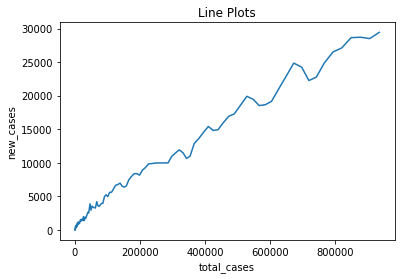

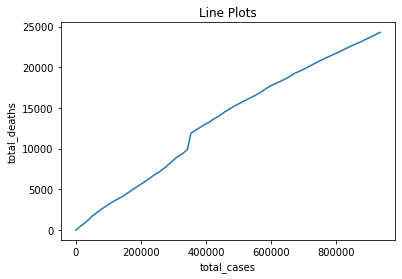

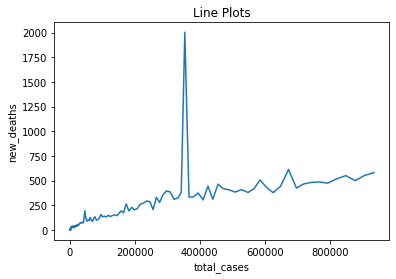

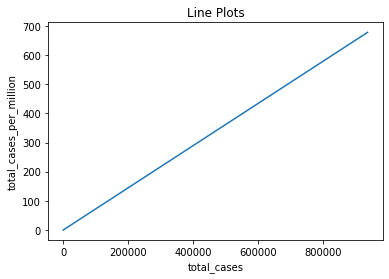

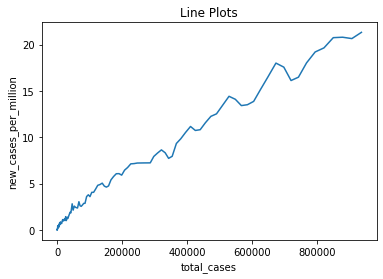

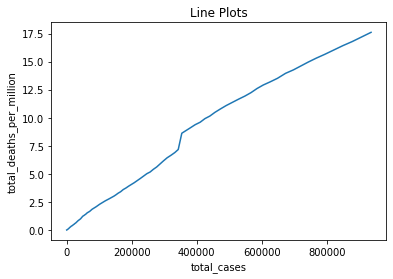

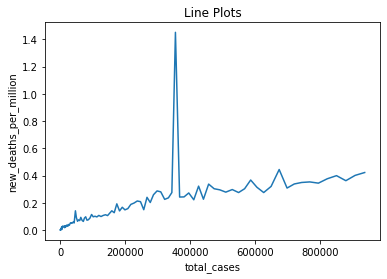

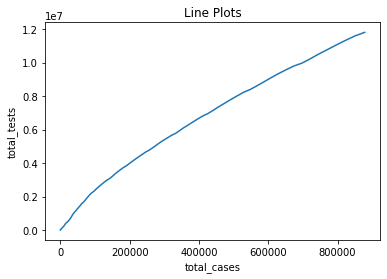

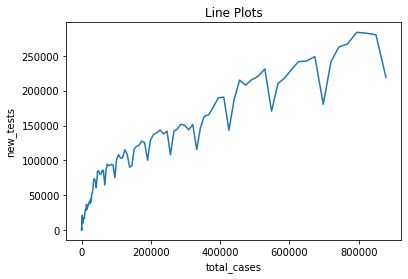

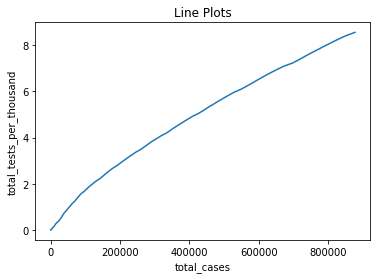

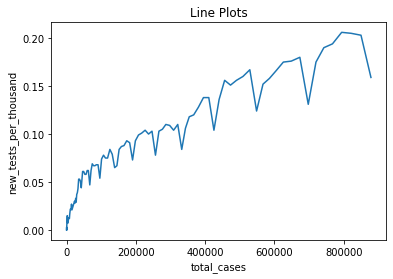

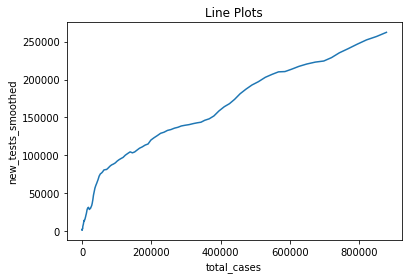

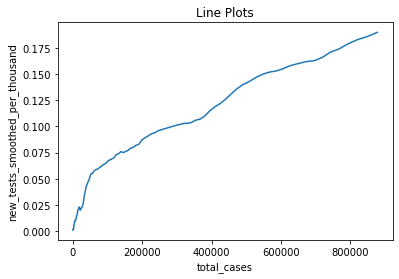

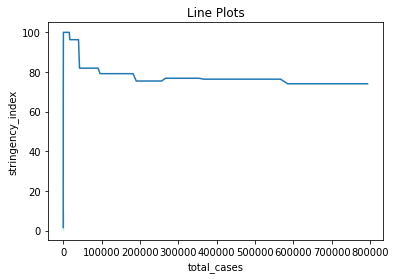

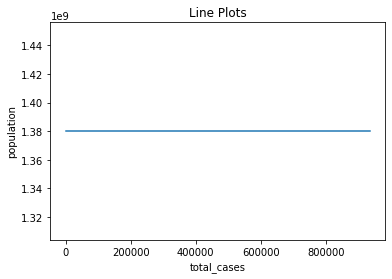

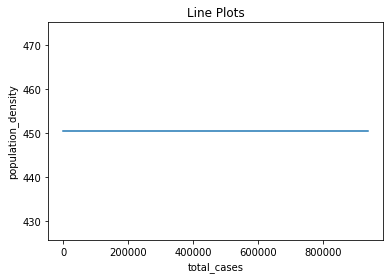

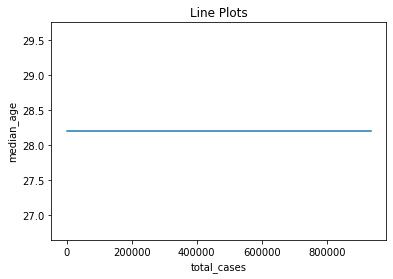

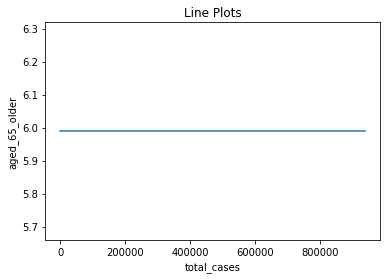

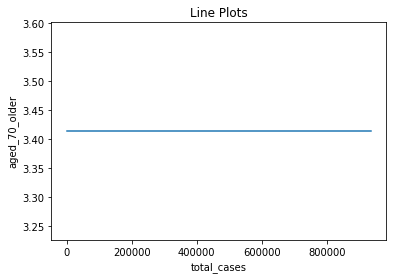

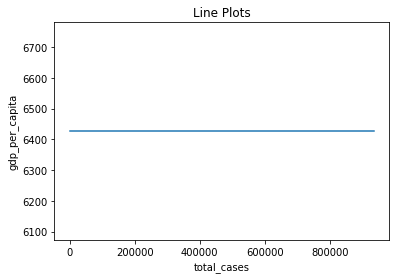

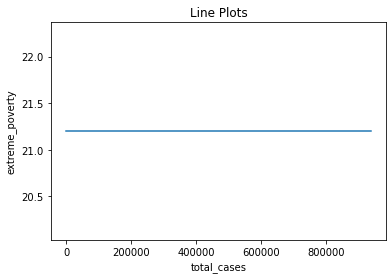

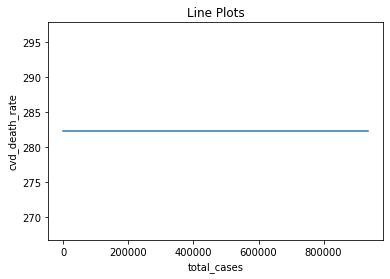

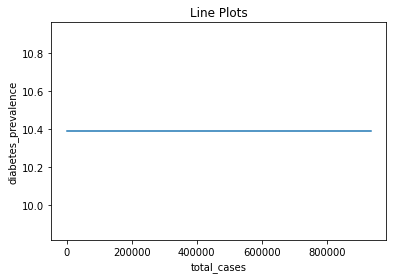

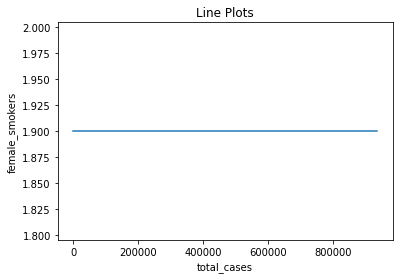

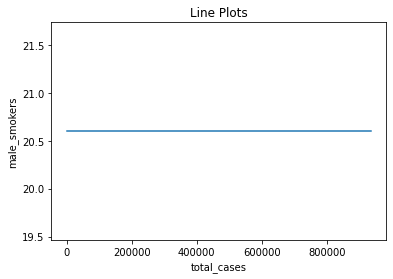

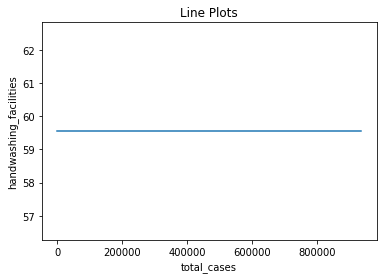

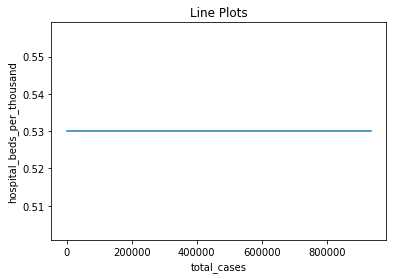

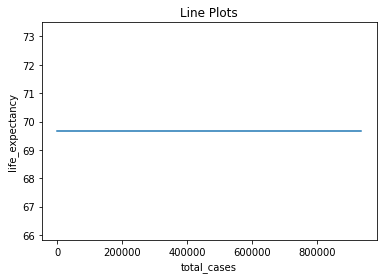

In [29]:
# Plotting Lineplots
for i in cols:
    sns.lineplot(x='total_cases',y=i,data=df)
    plt.title("Line Plots")
    plt.show()

In [30]:
# Removing outliers in the dataset
df.drop(df.index[168],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
# Checking the info once again
# df.info

In [32]:
# Observe the changes after removing outliers
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,1.100000e+02,104.000000,110.000000,104.000000,115.000000,115.000000,190.000000,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02,1.960000e+02
mean,126610.051020,4720.443878,3680.755102,113.806122,91.746066,3.420607,2.667214,0.082459,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,55.195632,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
std,223881.371345,7487.935555,6339.793839,163.819360,162.232388,5.426025,4.594040,0.118680,3.476029e+06,78221.606192,2.518814,0.056707,75906.414295,0.055029,38.214258,0.000000e+00,5.698898e-13,1.032925e-13,1.335679e-14,9.349755e-15,1.914830e-11,7.479804e-14,7.408568e-13,4.452264e-14,4.452264e-15,6.411261e-14,1.211016e-13,8.904529e-16,1.139780e-13
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.500000e+03,157.000000,0.005000,0.000000,1121.000000,0.001000,0.000000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
25%,3.000000,0.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,4.168448e+05,41062.750000,0.302000,0.029750,26182.000000,0.019000,10.190000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
50%,4807.500000,639.500000,131.500000,20.000000,3.484000,0.463500,0.095500,0.014500,2.353530e+06,100827.500000,1.705500,0.073500,87295.000000,0.063000,75.460000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
75%,146976.750000,6682.250000,4209.500000,171.250000,106.504250,4.842500,3.050750,0.124000,5.745253e+06,151526.000000,4.163000,0.110000,141078.000000,0.102500,81.940000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01
max,936181.000000,29429.000000,24309.000000,613.000000,678.390000,21.325000,17.615000,0.444000,1.180626e+07,283659.000000,8.555000,0.206000,262371.000000,0.190000,100.000000,1.380004e+09,4.504190e+02,2.820000e+01,5.989000e+00,3.414000e+00,6.426674e+03,2.120000e+01,2.822800e+02,1.039000e+01,1.900000e+00,2.060000e+01,5.955000e+01,5.300000e-01,6.966000e+01


In [33]:
# Replacing the null values with the mean of the columns
#df.fillna(df.mean(), inplace=True)
df=df.fillna(df.mean())

In [34]:
# Replacing the null categorical columns with their mode
df['tests_units'].fillna(df['tests_units'].mode()[0],inplace=True)

In [35]:
# Now there are no Null values in the Dataset
#df.info()
df.isnull().sum()

iso_code                           0
continent                          0
location                           0
date                               0
total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
total_tests                        0
new_tests                          0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
tests_units                        0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
c

In [36]:
# Convert date column to ordinal
import datetime as dt 
df["date"]=pd.to_datetime(df["date"]) 
df["date"]=df["date"].map(dt.datetime.toordinal)

In [37]:
# Date column was changed to ordinal
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,IND,Asia,India,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,samples tested,55.195632,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,IND,Asia,India,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,samples tested,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,IND,Asia,India,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,samples tested,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,IND,Asia,India,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,samples tested,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,IND,Asia,India,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,samples tested,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [38]:
# Droping the categorical columns to prepare the dataset for training
df.drop(['iso_code', 'continent','location','tests_units'], axis=1, inplace=True)
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
12708,737424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,55.195632,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12709,737425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12710,737426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12711,737427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66
12712,737428,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.499802e+06,110655.586538,2.536109,0.080183,94478.843478,0.068461,0.000000,1.380004e+09,450.419,28.2,5.989,3.414,6426.674,21.2,282.28,10.39,1.9,20.6,59.55,0.53,69.66


In [39]:
# Create arrays for the features and the response variable
y = df["total_cases"].values
X = df.drop(["total_cases"],axis=1).values

In [40]:
# Train and Test splitting of data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [41]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create the regressor: reg
reg= LinearRegression()

# Fit the regressor to the training data
reg.fit(X_train,y_train)

# Predict on the test data: y_pred
y_pred=reg.predict(X_test)

#Score the model
reg.score(X_test,y_test)

0.9999999999982944

In [42]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9999999999982944
Root Mean Squared Error: 0.3511464476118608


In [43]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor()
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 

# Predict on the test data: y_pred
y_pred=rf.predict(X_test)

#Score the model
rf.score(X_test,y_test)

0.9867352804012125